In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [26]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')


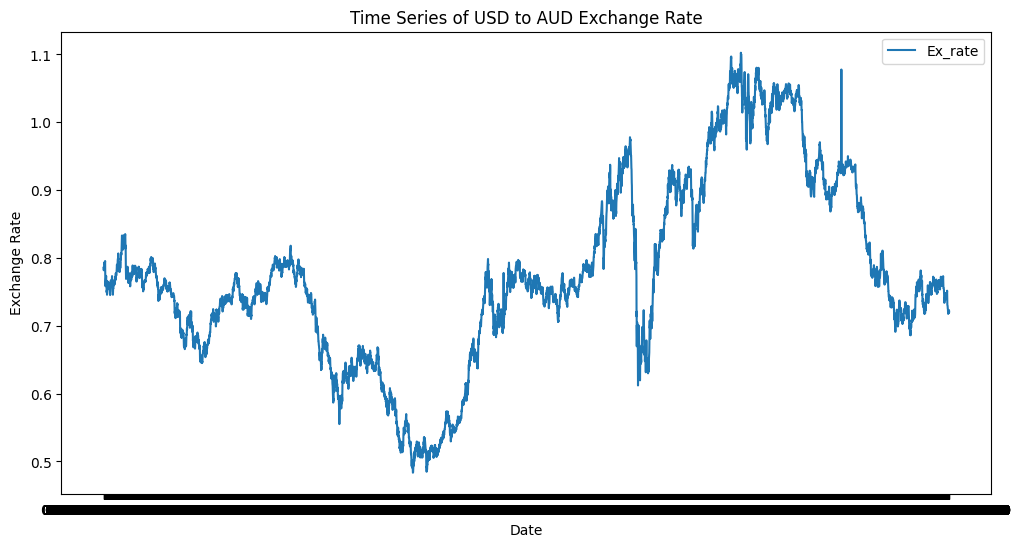

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Ex_rate')
plt.title('Time Series of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [28]:
df['Ex_rate'].fillna(method='ffill', inplace=True)


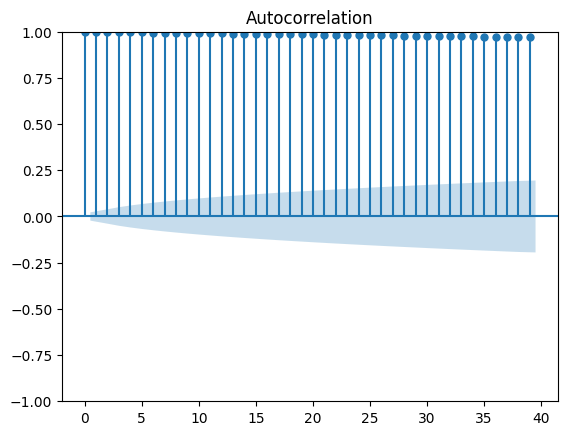

In [24]:
plot_acf(df['Ex_rate'])
plt.show()


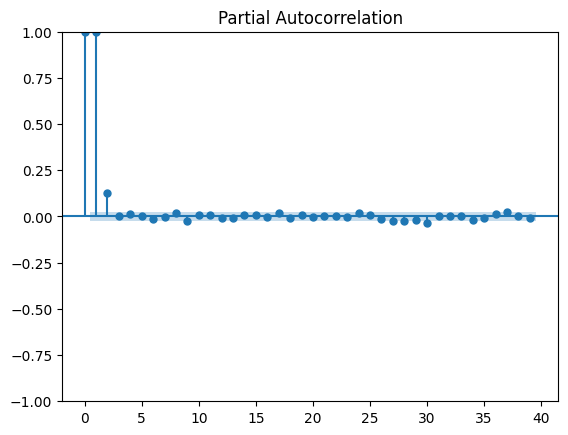

In [29]:
plot_pacf(df['Ex_rate'])
plt.show()

In [30]:

arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_result = arima_model.fit()

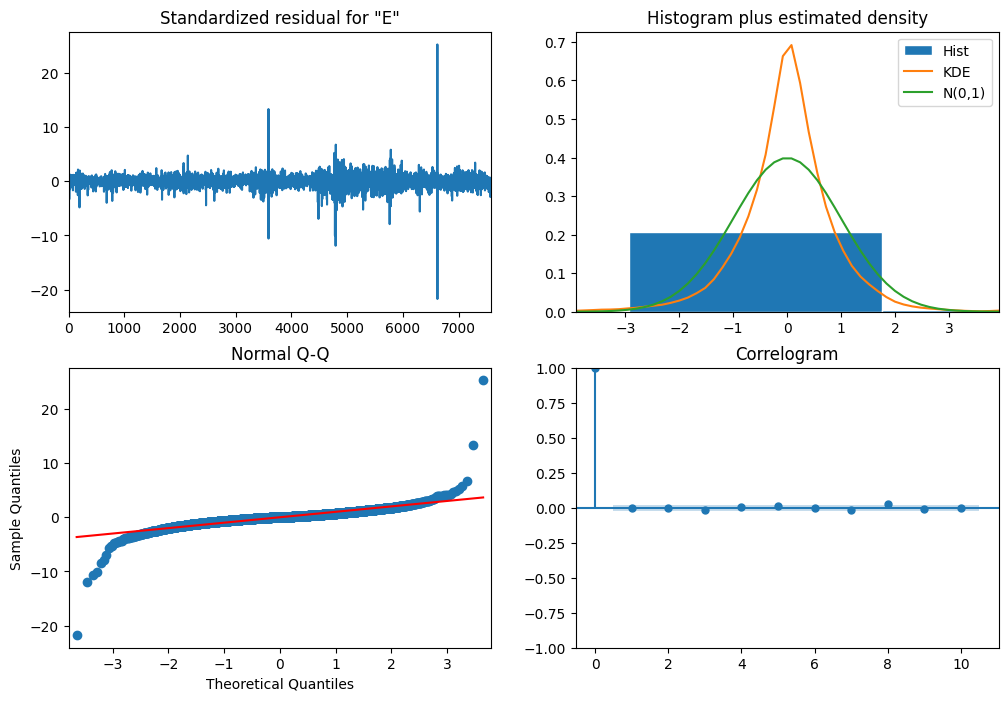

In [31]:
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

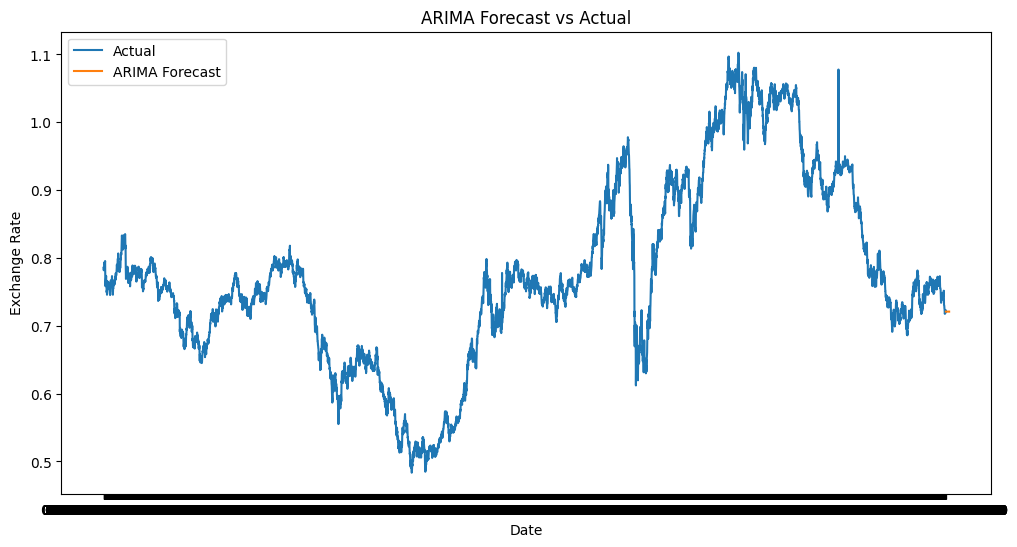

In [32]:
arima_forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [33]:
exp_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_result = exp_model.fit()

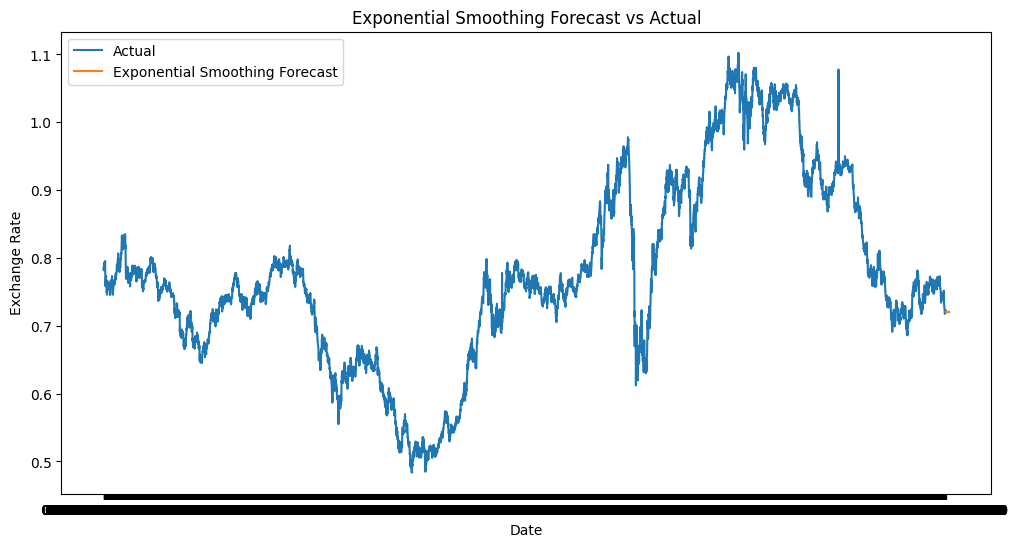

In [20]:
exp_forecast = exp_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [21]:
arima_mae = mean_absolute_error(df['Ex_rate'][-30:], arima_forecast)
exp_mae = mean_absolute_error(df['Ex_rate'][-30:], exp_forecast)

In [22]:
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], arima_forecast))
exp_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], exp_forecast))

In [23]:
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}')

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing MAE: 0.013017654522635458, RMSE: 0.017245999955208903
